<a href="https://colab.research.google.com/github/saisukirtha/YBM_ML_PROJECT/blob/main/Servo_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Servo** **Prediction**

#  **Objective** - For Servo Prediction

# ****Data Source**** -"https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv" --**GITHUB**

# ****Import Library****

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# ****Import Data****

In [3]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

#  **Describe Data**

In [4]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [6]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [7]:
df.isnull().sum()

Motor    0
Screw    0
Pgain    0
Vgain    0
Class    0
dtype: int64

In [8]:
df.isna().sum()

Motor    0
Screw    0
Pgain    0
Vgain    0
Class    0
dtype: int64

# ****Data Preprocessing****

In [9]:
df['Motor'].unique(),df['Screw'].unique()

(array(['E', 'B', 'D', 'C', 'A'], dtype=object),
 array(['E', 'D', 'A', 'B', 'C'], dtype=object))

In [10]:
df['Motor'].value_counts()

C    40
B    36
A    36
E    33
D    22
Name: Motor, dtype: int64

In [11]:
df['Screw'].value_counts()

A    42
B    35
C    31
D    30
E    29
Name: Screw, dtype: int64

In [12]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [13]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [19]:
co = df.corr()
co

,Motor,Screw,Pgain,Vgain,Class
Motor,1.000000,-0.052501,-0.037214,-0.003801,-0.112938
Screw,-0.052501,1.000000,-0.099503,0.011336,-0.162240
Pgain,-0.037214,-0.099503,1.000000,0.812268,-0.687098
Vgain,-0.003801,0.011336,0.812268,1.000000,-0.391963
Class,-0.112938,-0.162240,-0.687098,-0.391963,1.000000


# ****Data Visualization****

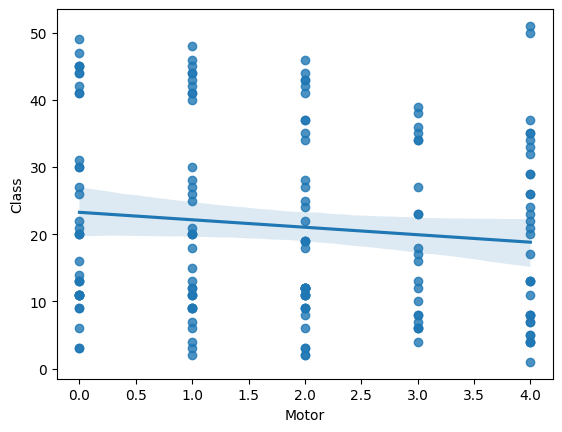

In [14]:
sns.regplot(data=df,x='Motor',y='Class');

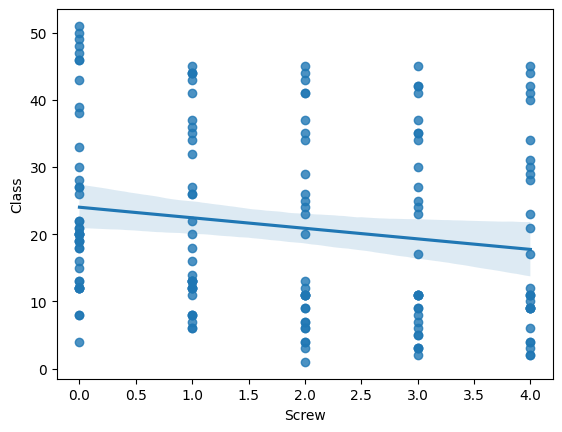

In [15]:
sns.regplot(data=df,x='Screw',y='Class');

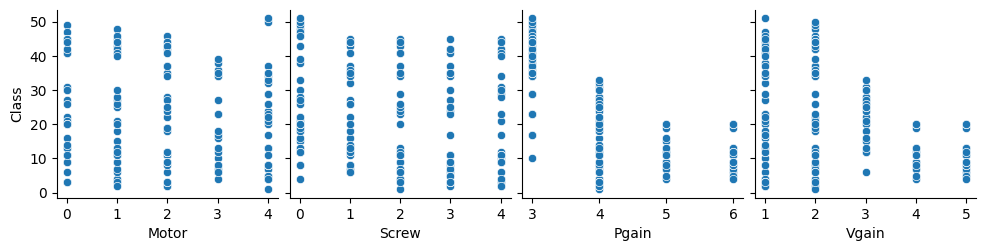

In [16]:
sns.pairplot(data=df,x_vars=['Motor','Screw','Pgain','Vgain'],y_vars='Class')

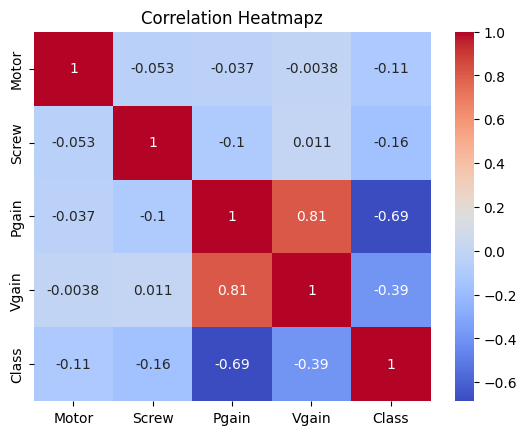

In [20]:
sns.heatmap(data=co, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmapz")
plt.show()

# ****Define Target Variable (y) and Feature Variables (X)****

In [26]:
X = df[['Motor','Screw','Pgain','Vgain']]

In [30]:
y = df['Class']

# **Train Test Split**

In [21]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

# **Modeling**

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression()

# **Prediction**

In [35]:
predict = model.predict(X_train)

In [36]:
predict

array([ 5.50473804e+00,  1.27951763e+01,  3.71270517e+01,  1.89205642e+01,
        4.10861179e+01,  1.85939427e+01,  3.77615797e+01,  3.39564667e+01,
        7.93884452e+00,  2.83116536e+01,  6.56783803e+00,  1.31099167e+01,
        1.11563850e+01,  2.36161089e+01,  2.76272505e+00,  1.98109960e+01,
        1.54567181e+00,  3.13684070e+01,  2.81577004e+01,  7.61905687e+00,
        3.63905732e+01,  2.55696406e+01,  2.95287069e+01,  1.73887706e+01,
        1.87597771e+01,  3.33219387e+01,  1.75495577e+01,  2.07120607e-02,
        2.60877180e+00,  2.37700622e+01,  6.62667474e+00,  8.09279777e+00,
        3.05799257e+01,  7.78489127e+00,  1.37444448e+01,  1.13581488e+00,
        1.78054614e+01,  2.15086240e+01,  3.72810049e+01,  3.38025135e+01,
        1.56979765e+01,  1.93423023e+01,  1.79712958e+01,  2.91667830e+00,
       -3.55972981e+00,  2.42506370e+01,  2.60383343e+01,  2.11820024e+01,
        1.53832361e+01,  4.12400712e+01,  1.82792023e+01,  2.74093408e+01,
        1.29491296e+01,  

# **Model Evaluation**

In [37]:
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_error

In [38]:
r2_score(y_train,predict)

0.6456488124314852

In [39]:
mean_absolute_error(y_train,predict)

6.819754352583849

In [40]:
mean_squared_error(y_train,predict)

65.65237940906465

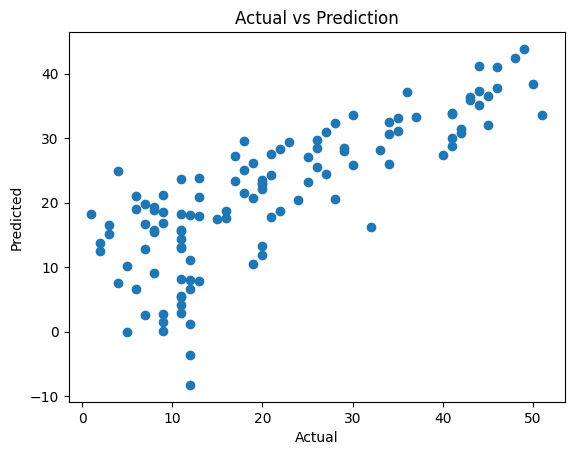

In [45]:
plt.scatter(y_train,predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Prediction')
plt.show()

In [51]:
data ={
    'Motor':[0],
    'Screw':[1],
    'Pgain':[3],
    'Vgain':[2]
}
new_data = pd.DataFrame(data)
val = model.predict(new_data)
print(val)

[41.24007115]


# **Explaination** Thus the servo values are predicted using the LinearRegression with the help of the few values.